In [21]:
#Задание 1
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

In [5]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

In [6]:
df.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [17]:
# Предпочитаемый метод оплаты (смотрю только по завершенным заказам)
preferred_payment = df[df['Order Status'] == 'Completed'].groupby('Customer ID')['Payment Method'].agg(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'
).reset_index()
preferred_payment.columns = ['Customer ID', 'Preferred Payment Method']

preferred_payment.head(5)

,Customer ID,Preferred Payment Method
0,1000,Paypal
1,1002,Cash
2,1003,Cash
3,1004,Credit Card
4,1005,Debit Card


In [18]:
# Общие траты (только завершенные заказы)
total_spending = df[df['Order Status'] == 'Completed'].groupby('Customer ID')['Total Price'].sum().reset_index()
total_spending.columns = ['Customer ID', 'Total Spending']
total_spending = total_spending.sort_values('Total Spending', ascending=False)

total_spending.head(5)

,Customer ID,Total Spending
5048,11476,29937.93
7095,15399,29084.88
6177,13635,28093.28
7584,16357,27486.01
4960,11332,26725.65


In [19]:
# Траты на дополнительные услуги (только завершенные заказы)
addon_spending = df[df['Order Status'] == 'Completed'].groupby('Customer ID')['Add-on Total'].sum().reset_index()
addon_spending.columns = ['Customer ID', 'Add-on Spending']
addon_spending = addon_spending.sort_values('Add-on Spending', ascending=False)

addon_spending.head(5)

,Customer ID,Add-on Spending
7937,17054,658.32
7221,15648,640.44
5139,11669,613.83
5749,12780,595.63
4926,11270,580.85


In [ ]:
#ЗАДАНИЕ 2

Доход по методам доставки:
Shipping Type
Expedited     8430385.58
Express       5632093.35
Overnight     5887722.52
Same Day      8292376.50
Standard     14387037.62
Name: Total Price, dtype: float64

Доход по типам продуктов:
Product Type
Headphones     2734651.00
Laptop         8365905.25
Smartphone    14407835.84
Smartwatch     9398591.23
Tablet         7722632.25
Name: Total Price, dtype: float64

Доход от доп. услуг по месяцам:
Month
1     93254.95
2     80253.72
3     84713.93
4     82294.06
5     89374.18
6     84648.60
7     88811.55
8     87861.11
9     71026.37
10    26153.21
11    24453.33
12    22750.23
Name: Add-on Total, dtype: float64

Доход от доп. услуг по кварталам:
Quarter
1    258222.60
2    256316.84
3    247699.03
4     73356.77
Name: Add-on Total, dtype: float64


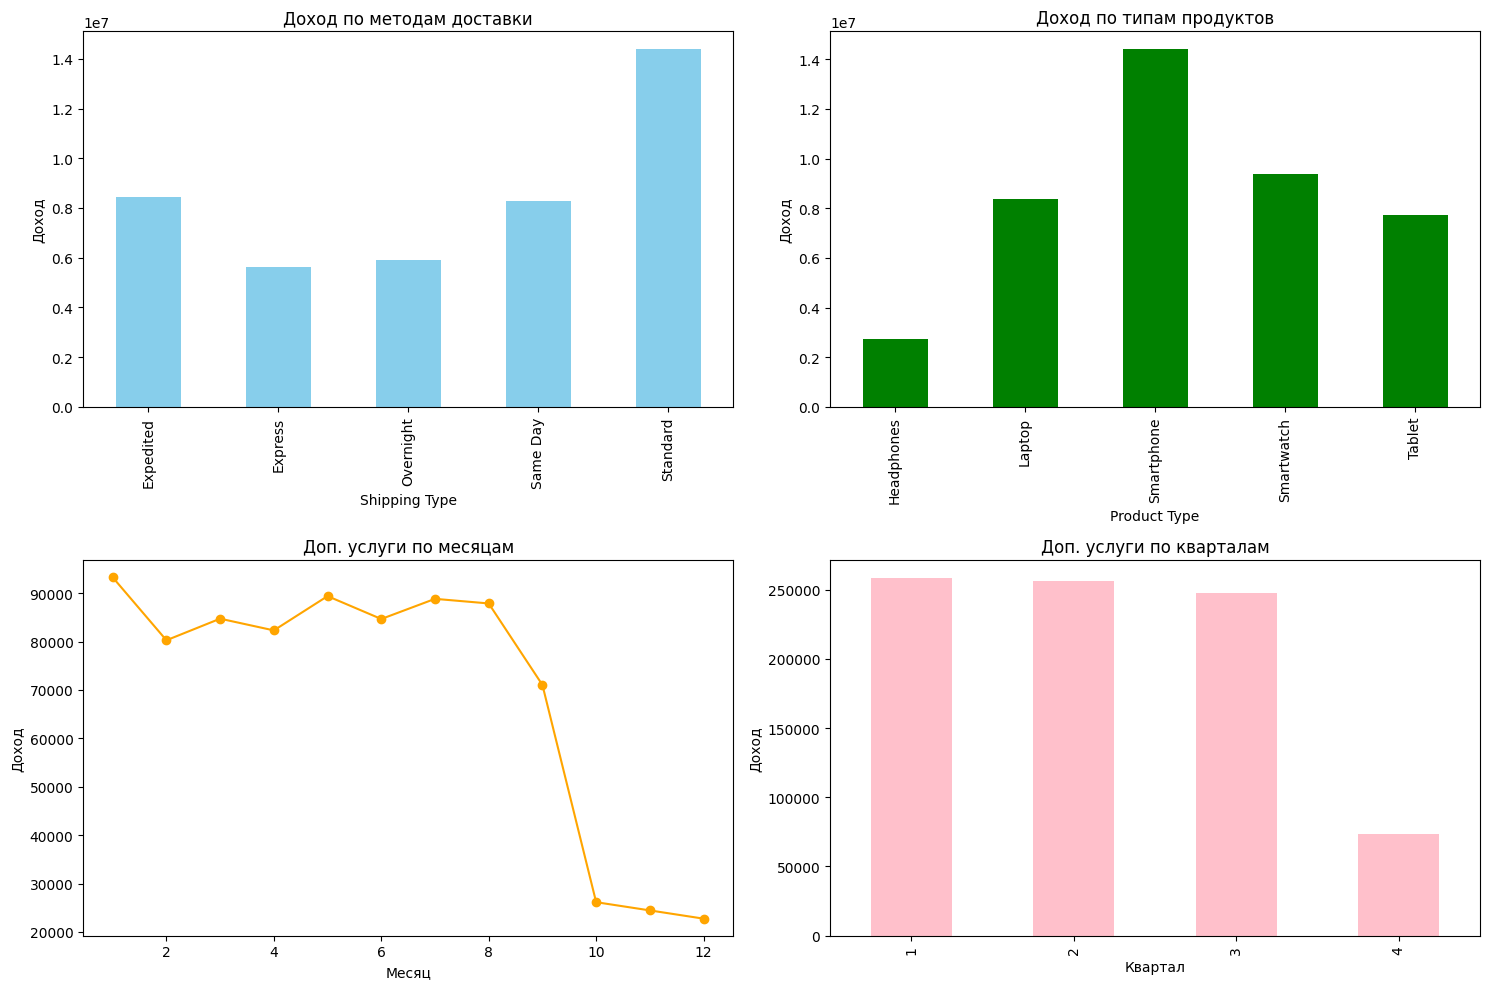

In [24]:
df = df[df['Order Status'] == 'Completed']

#доход по методам доставки
print("Доход по методам доставки:")
shipping_income = df.groupby('Shipping Type')['Total Price'].sum()
print(shipping_income)
print()

#доход по типам продуктов
print("Доход по типам продуктов:")
product_income = df.groupby('Product Type')['Total Price'].sum()
print(product_income)
print()

#доход от доп. услуг по месяцам
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.month

print("Доход от доп. услуг по месяцам:")
monthly_addon = df.groupby('Month')['Add-on Total'].sum()
print(monthly_addon)
print()

#доход от доп. услуг по кварталам
df['Quarter'] = df['Purchase Date'].dt.quarter

print("Доход от доп. услуг по кварталам:")
quarterly_addon = df.groupby('Quarter')['Add-on Total'].sum()
print(quarterly_addon)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
shipping_income.plot(kind='bar', color='skyblue')
plt.title('Доход по методам доставки')
plt.ylabel('Доход')

plt.subplot(2, 2, 2)
product_income.plot(kind='bar', color='green')
plt.title('Доход по типам продуктов')
plt.ylabel('Доход')

plt.subplot(2, 2, 3)
monthly_addon.plot(kind='line', marker='o', color='orange')
plt.title('Доп. услуги по месяцам')
plt.ylabel('Доход')
plt.xlabel('Месяц')

plt.subplot(2, 2, 4)
quarterly_addon.plot(kind='bar', color='pink')
plt.title('Доп. услуги по кварталам')
plt.ylabel('Доход')
plt.xlabel('Квартал')

plt.tight_layout()
plt.show()